In [6]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel

import pandas as pd
%matplotlib inline

In [7]:
training_folder = '../../'

In [8]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/walk_model.zip')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 17.19it/s]


# average speed on road_links

bus_speed 4.482695381970692 m / s


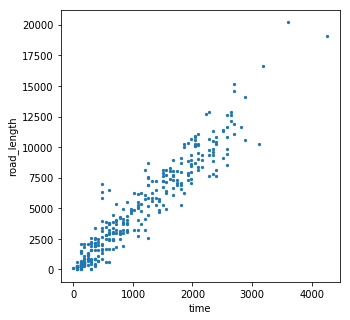

In [73]:
bus = sm.links.loc[sm.links['route_type'] == 'bus']
bus_lines = bus.groupby('route_id')[['time', 'road_length']].sum()
plot = bus_lines.plot(kind='scatter', x='time', y='road_length', figsize=[5, 5], s=5)
bus_speed = bus['road_length'].sum() / bus['time'].sum() # operation speed
print('bus_speed', bus_speed, 'm / s')

# required fields !

In [74]:
# pt
sm.links['headway'] = 300
sm.links['length'] = sm.links['road_length']

# road
car_speed = bus_speed * 1.25
sm.road_links['time'] = sm.road_links['length'] / car_speed # m/s

# pt_pathfinder

In [75]:
sm.step_pt_pathfinder()

path_analysis: 100%|██████████████████████████████████████████████████████████| 12100/12100 [00:00<00:00, 25910.70it/s]


# road_pathfinder

In [76]:
sm.step_road_pathfinder(all_or_nothing=True)

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:07<00:00, 12.03it/s]


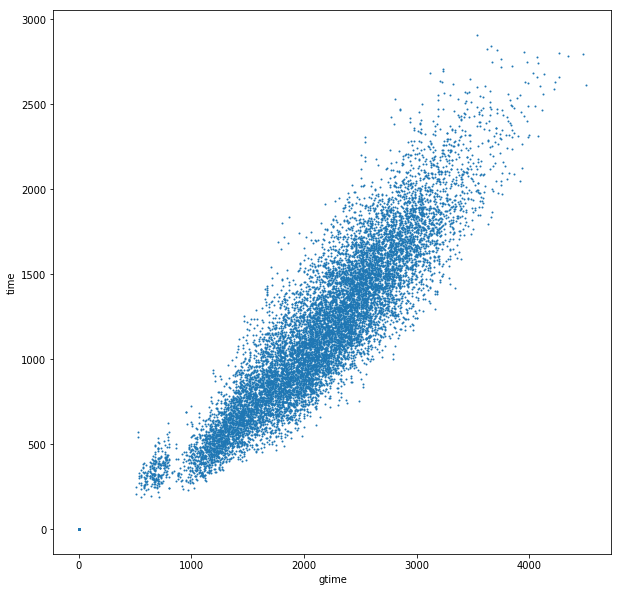

In [81]:
los = pd.merge(sm.pt_los, sm.car_los, on=['origin', 'destination'])
los.plot(kind='scatter', x='gtime', y='time', figsize=[10, 10], s=1)

In [93]:
sm.to_zip(training_folder + 'model/transport/aon_pathfinder.zip')  

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 32/32 [00:04<00:00,  7.13it/s]


# display

In [83]:
projected = sm.change_epsg(4326, 'degree')

Reprojecting model from epsg 2154 to epsg 4326: 100%|██████████████████████████████████| 32/32 [00:03<00:00,  8.03it/s]


In [85]:
from quetzal.io import display
from imp import reload
reload(display)

<module 'quetzal.io.display' from '../../../quetzal\\quetzal\\io\\display.py'>

In [91]:
m = display.pt_path(projected, 'zone_44',  'zone_73', color_column='route_color', group_name='route_short_name')
display.car_path(projected, 'zone_44',  'zone_73', m=m)